In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math
from IPython.display import Image
%matplotlib inline

#Esta próxima sección limpia los datos, ya que asume que las tres categorías 'Name', 'Ticket', y 'Cabin' no son relevantes 

In [2]:
data = pd.read_csv('train.csv')
dataCopy = data
del dataCopy['Name']
del dataCopy['Ticket']
del dataCopy['Cabin']

#Ahora, conocemos que la columna Age 

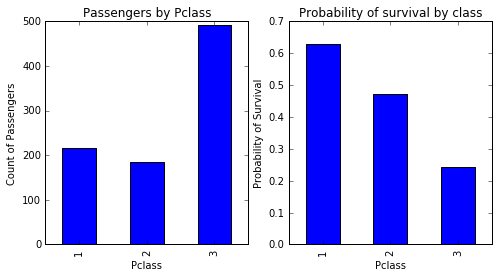

In [8]:
#Agrupamos el conteo de sobrevivencia
temp1 = dataCopy.groupby('Pclass').Survived.count()
temp2 = dataCopy.groupby('Pclass').Survived.sum()/dataCopy.groupby('Pclass').Survived.count()
fig = plt.figure(figsize=(8,4))
#Agregamos el grafico usando matplotlib, desde pandas.
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Pclass')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Pclass")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by class")

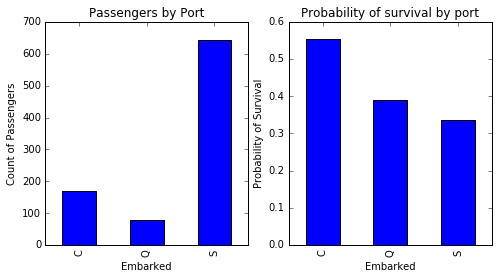

In [52]:
#Agrupamos el conteo de sobrevivencia
temp1 = dataCopy.groupby('Embarked').Survived.count()
temp2 = dataCopy.groupby('Embarked').Survived.sum()/dataCopy.groupby('Embarked').Survived.count()
fig = plt.figure(figsize=(8,4))
#Agregamos el grafico usando matplotlib, desde pandas.
ax1 = fig.add_subplot(121)
ax1.set_xlabel('A')
ax1.set_ylabel('Count of Passengers')
ax1.set_title("Passengers by Port")
temp1.plot(kind='bar')


ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Embarked')
ax2.set_ylabel('Probability of Survival')
ax2.set_title("Probability of survival by port")

In [14]:
pd.crosstab([dataCopy.Pclass, dataCopy.Sex], dataCopy.Survived.astype(bool))

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

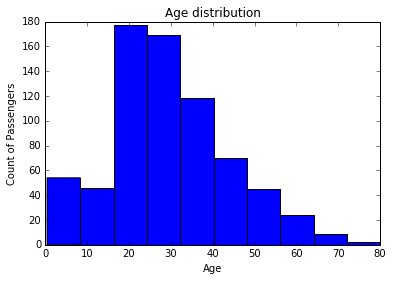

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(dataCopy['Age'].min(),dataCopy['Age'].max(),1)
ax.hist(dataCopy['Age'], bins = 10, range = (dataCopy['Age'].min(),dataCopy['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

/Users/rubenmarcos/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x1176a39b0>],
 'caps': [<matplotlib.lines.Line2D at 0x1169169b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x115c43668>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x113b71978>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11690a940>,
  <matplotlib.lines.Line2D at 0x1167a3ba8>]}

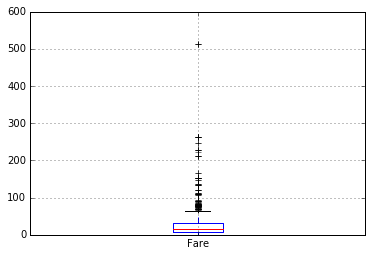

In [45]:
dataCopy.boxplot(column='Fare')

In [26]:
dataCopyMale = data[data['Sex'] == 'male']

In [27]:
dataCopyMale.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
4,5,0,3,male,35.0,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.0,0,0,51.8625,S
7,8,0,3,male,2.0,3,1,21.0750,S


In [28]:
dataCopyMale.Age.mean()

30.72664459161148

In [29]:
dataCopyFemale = data[data['Sex'] == 'female']

In [33]:
dataCopyFemale.Age.mean()

27.915708812260537

In [35]:
dataCopyMale["Age"] = dataCopyMale["Age"].fillna(dataCopyMale["Age"].mean())

/Users/rubenmarcos/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
dataCopyFemale["Age"] = dataCopyFemale["Age"].fillna(dataCopyFemale["Age"].mean())

/Users/rubenmarcos/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [39]:
frames = [dataCopyMale, dataCopyFemale]

In [40]:
dataCopyAge = pd.concat(frames)

In [44]:
dataCopyAge.sort_index()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,30.726645,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


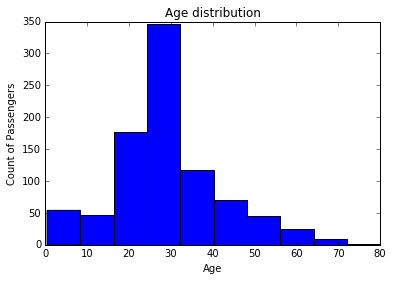

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(dataCopyAge['Age'].min(),dataCopyAge['Age'].max(),1)
ax.hist(dataCopyAge['Age'], bins = 10, range = (dataCopyAge['Age'].min(),dataCopyAge['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

In [66]:
dataArray = np.array(dataCopyAge)

In [69]:
#from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#sel.fit_transform(dataArray)
from sklearn.feature_selection import chi2
# compute chi2 for each feature
chi2score = chi2(dataArray,1)[0]

ValueError: could not convert string to float: 'S'